# compare BNB and EXTBNB data to MC-BNB/DATA cosmic overlay 

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 0.706423396358 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.516400806804 = N(POT on beam)/N(POT MC)


In [2]:
debug = 1
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/OnOffComparisonsPlayground/'

In [3]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_extbnb_v11_mcc8_dev_v04_2018_02_27_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_extbnb_v11_mcc8_dev_v05_2018_02_27_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

OnBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_bnb_v11_unblind_mcc8_v04_2018_03_04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_bnb_v11_unblind_mcc8_v05_2018_02_12_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples(filename='ecohen_physical_files_adi_prodgenie_bnb_nu_uboone_overlay_cosmic_data_100K_reco2_2018_02_23_vertices')
cuts_pureff = apply_cuts_MCbnbDATAcosmic()
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

34675 pairs from Off-Beam
21070 pairs from Off-Beam in FV
38051 pairs from On-Beam
24263 pairs from On-Beam in FV
28674 pairs from MC-BNB + cosmic DATA overlay
18908 pairs in FV
5087 are 1mu-1p, 26.9%
4335 are other pairs, 22.9%
9486 are cosmic, 50.2%
--------------------------------------------------------------
2514 are CC 1p 0pi, 13.3%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.9%,100.0%,13.3%,no cut,100.0% (5087),100.0% (4335),100.0% (9486),100.0% (2514)
PIDa,85.4%,53.6%,84.5%,26.2%,${PID}_a>13$,85.4% (4345),55.3% (2398),14.4% (1368),84.5% (2124)
flashes,85.1%,55.9%,84.2%,27.3%,$N_{flashes}>0$,85.1% (4328),55.1% (2390),10.8% (1020),84.2% (2116)
flash,80.4%,57.9%,79.3%,28.3%,optical filter,80.4% (4089),53.2% (2306),7.0% (662),79.3% (1994)
length,66.6%,67.4%,69.5%,34.7%,$l_{\mu}>l_{p}$,66.6% (3390),29.3% (1271),3.9% (370),69.5% (1746)
non-collinearity,59.7%,73.4%,64.6%,39.3%,"$|\theta_{1,2}-90^0|<55^0$",59.7% (3039),20.7% (899),2.1% (202),64.6% (1625)
vertex activity,40.7%,76.9%,55.5%,51.9%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",40.7% (2068),11.8% (513),1.1% (107),55.5% (1395)
delta phi,27.1%,90.6%,42.5%,70.3%,$|\Delta \phi - \pi|<35^0$,27.1% (1377),2.7% (118),0.3% (25),42.5% (1069)
Pt no Delta phi,30.7%,84.9%,45.7%,62.5%,$p_{t}<0.35$ GeV/c,30.7% (1562),5.3% (229),0.5% (49),45.7% (1150)
soft Pt,23.8%,93.0%,38.2%,73.8%,$p_{t}<0.35$ GeV/c,23.8% (1210),1.7% (75),0.2% (16),38.2% (960)


reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# -- -- -- -- -- ---- - ---- 
# Optical filtering
# -- -- -- -- -- ---- - ---- 
minPEcut = 100
maxdYZcut = 200                              
sam = reduced_OffBeam['no cut']
reduced_OffBeam['flash'] = sam[(sam['Nflashes']>0)
                               &(sam['ClosestFlash_TotalPE'] > minPEcut)                               
                               &(sam['ClosestFlash_YZdistance'] < maxdYZcut)]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['flash'] = sam[(sam['Nflashes']>0)
                              &(sam['ClosestFlash_TotalPE'] > minPEcut)                                
                              &(sam['ClosestFlash_YZdistance'] < maxdYZcut)]
print "len(reduced_OffBeam['flash']):",len(reduced_OffBeam['flash'])
print "len(reduced_OnBeam['flash']):",len(reduced_OnBeam['flash'])



# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['flash']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['flash']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<55^0$
theta_12_cut = 55
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru,Rv,Ry = 'RdQaroundVertex[plane 0]'+box_str,'RdQaroundVertex[plane 1]'+box_str,'RdQaroundVertex[plane 2]'+box_str
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.35
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (sqrt( square(sam[Ru]-1) 
                                                  + square(sam[Rv]-1) 
                                                  + square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (sqrt( square(sam[Ru]-1) 
                                                  + square(sam[Rv]-1) 
                                                  + square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 35
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

# study the evolution of PIDa(p) in On-Off beam without applying the PIDa(p) cut

In [5]:
reducedOverlay,pureffOverlay = apply_cuts_to_overlay(MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                                                     ,PIDa_p_min=13
                                                     ,minPEcut = 100
                                                     ,maxdYZcut = 200
                                                     ,delta_theta_12=55  # deg.
                                                     ,opt_box=(50,100) # [Nwires x Nticks]
                                                     ,r_max_RdQ_CC1p0pi = 0.35 # sphere in U,V,Y space
                                                     ,delta_Delta_phi=35 # deg.
                                                     ,Pt_max=0.35          
                                                     ,cuts_order=['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt'] )

grabbing reduced samples after ( no cut ) and applying cut on ( flash )
grabbing reduced samples after ( flash ) and applying cut on ( length )
grabbing reduced samples after ( length ) and applying cut on ( non-collinearity )
grabbing reduced samples after ( non-collinearity ) and applying cut on ( vertex activity )
grabbing reduced samples after ( vertex activity ) and applying cut on ( delta phi )
grabbing reduced samples after ( delta phi ) and applying cut on ( soft Pt )


In [6]:
reducedOnBeam,reducedOffBeam = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,PIDa_p_min=13
                                                     ,minPEcut = 100
                                                     ,maxdYZcut = 200
                                                     ,delta_theta_12=55  # deg.
                                                     ,opt_box=(50,100) # [Nwires x Nticks]
                                                     ,r_max_RdQ_CC1p0pi = 0.35 # sphere in U,V,Y space
                                                     ,delta_Delta_phi=35 # deg.
                                                     ,Pt_max=0.35          
                                                     ,cuts_order=['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt'] )

grabbing reduced data samples after ( no cut ) and applying cut on ( flash )
len(OnBeam): 24263
len(OffBeam): 21070
grabbing reduced data samples after ( flash ) and applying cut on ( length )
len(OnBeam): 14740
len(OffBeam): 11016
grabbing reduced data samples after ( length ) and applying cut on ( non-collinearity )
len(OnBeam): 5669
len(OffBeam): 3457
grabbing reduced data samples after ( non-collinearity ) and applying cut on ( vertex activity )
len(OnBeam): 2764
len(OffBeam): 1136
grabbing reduced data samples after ( vertex activity ) and applying cut on ( delta phi )
len(OnBeam): 1388
len(OffBeam): 577
grabbing reduced data samples after ( delta phi ) and applying cut on ( soft Pt )
len(OnBeam): 654
len(OffBeam): 183


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/OnOffComparisonsPlayground/PIDa_proton_with_cuts.pdf


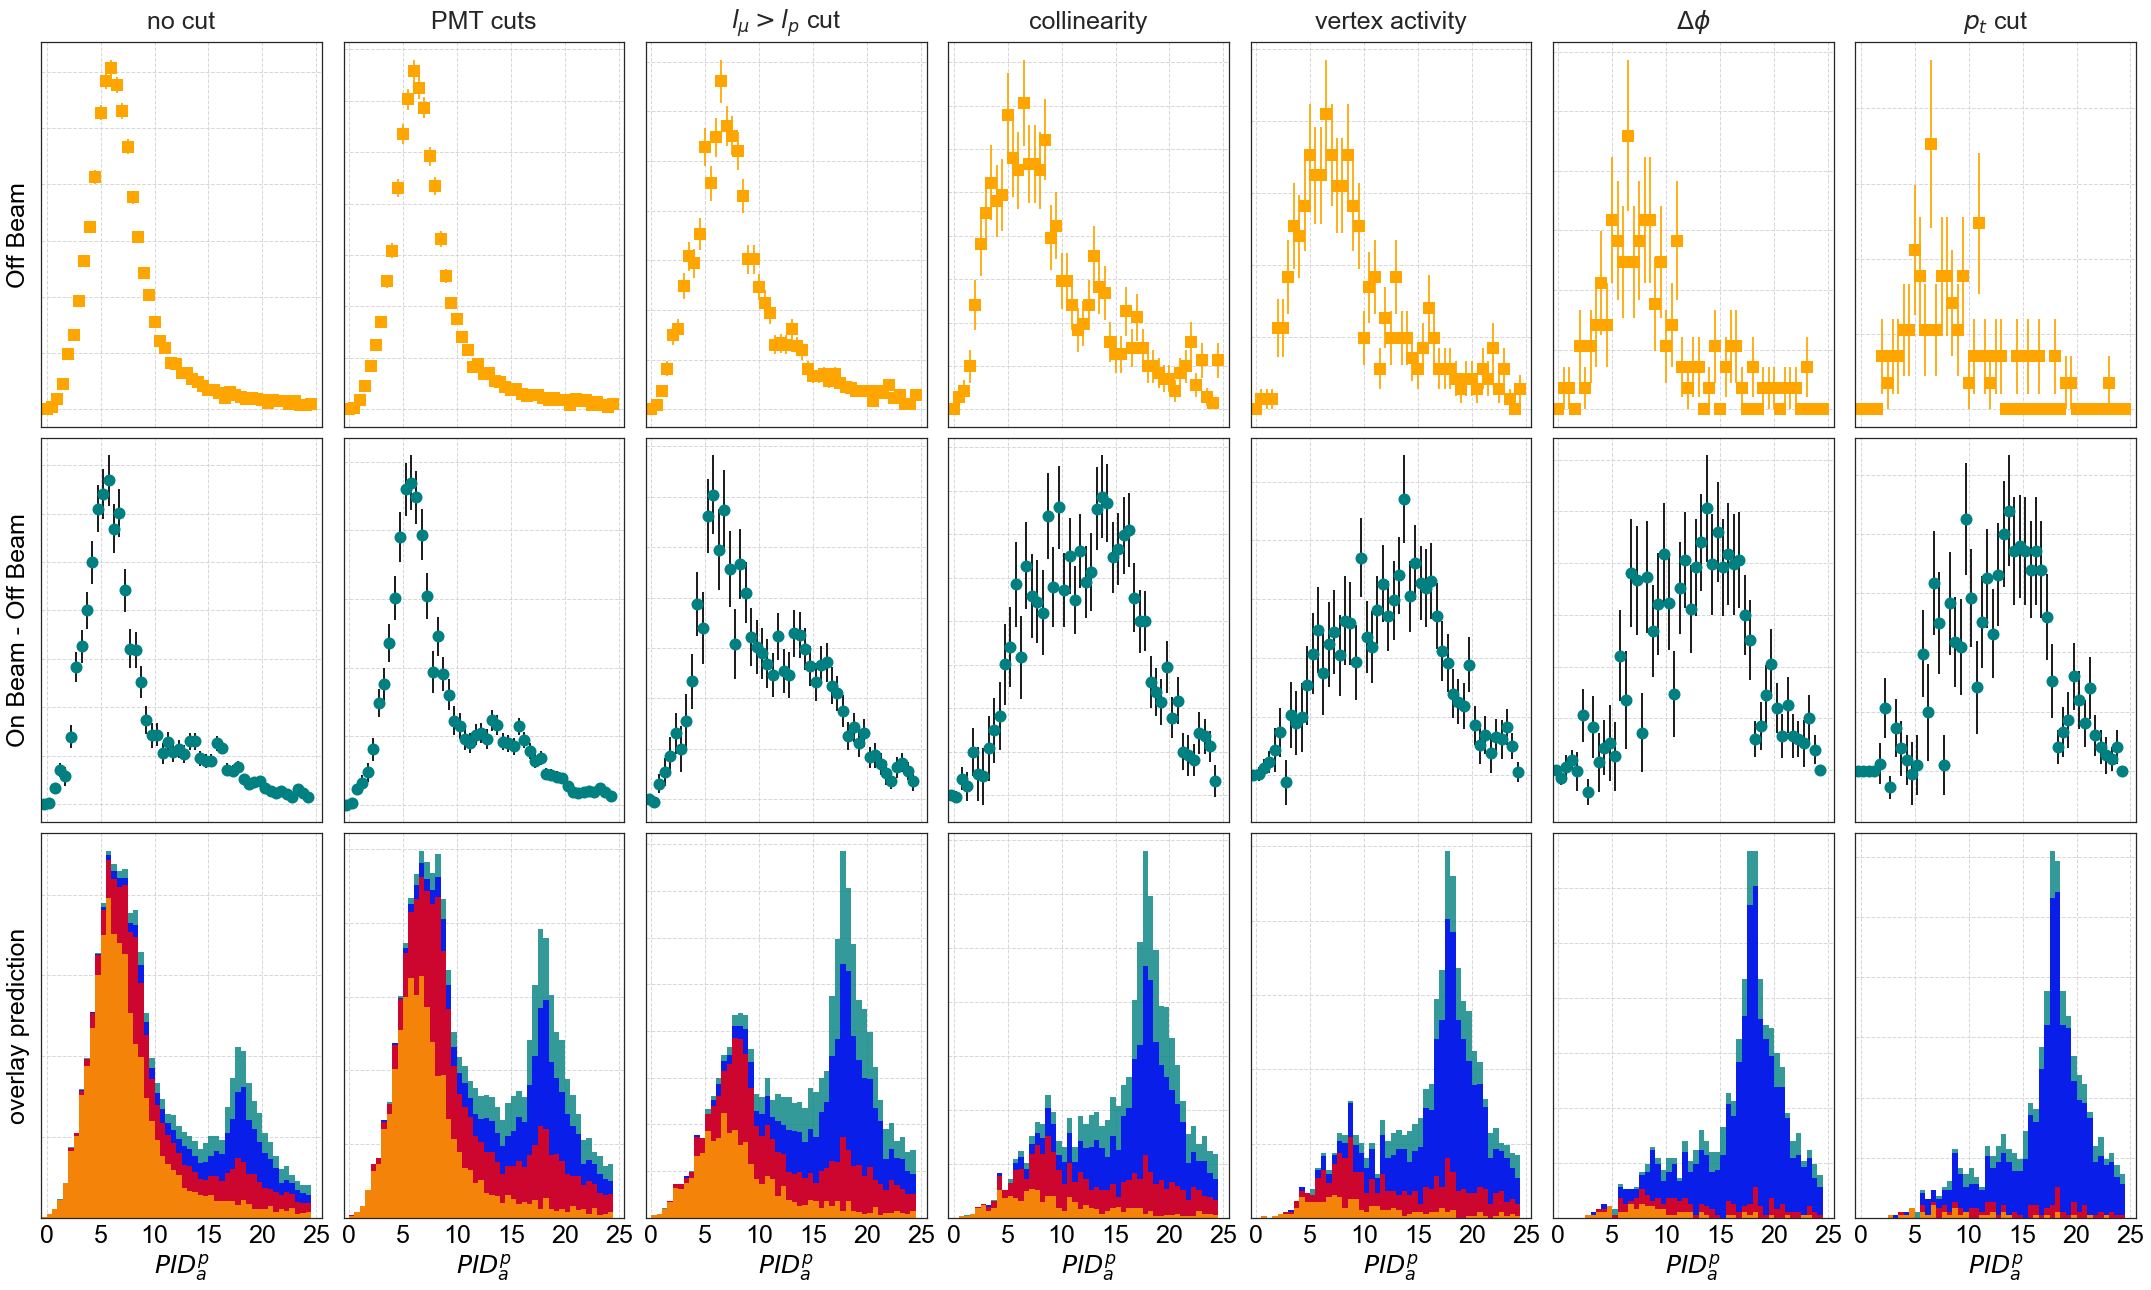

In [7]:
bins=np.linspace(0,25,51)
var='PIDa_assigned_proton'
x_label = r'$PID_{a}^{p}$'
fig = plt.figure(figsize=(30,18))

for i_cut,(cut_name,cut_label) in enumerate(zip(['no cut','flash','length','non-collinearity','vertex activity','delta phi', 'soft Pt']
                                ,['no cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$', '$p_t$ cut'])):
        
    ax = fig.add_subplot(3,7,i_cut+1)
    plot_OffBeam(OffBeamSample=reducedOffBeam[cut_name],OffBeamFV=reducedOffBeam['no cut']
                    , var=var, x_label='', bins=bins, ax=ax , y_label='Off Beam' if i_cut==0 else ''
                    , do_add_legend=False , legend_loc='best'                    
                 , do_OffBeam_scaling=True)
    ax.get_xaxis().set_major_formatter(NullFormatter())
    ax.set_title(cut_label,y=1.02,fontsize=25)
    ax.get_yaxis().set_major_formatter(NullFormatter())
    
    ax = fig.add_subplot(3,7,i_cut+7+1)
    ax=OnBeam_minus_OffBeam_1d(debug=0,doOffBeam_scaling=True
                                   ,OnBeamSample=reducedOnBeam[cut_name] ,OriginalOnBeamSample=reducedOnBeam['no cut']
                                   ,OffBeamSample=reducedOffBeam[cut_name]  ,OriginalOffBeamSample=reducedOffBeam['no cut']
                                   ,do_add_MCoverlay=False , y_label='On Beam - Off Beam' if i_cut==0 else ''
                                   ,var=var , x_label='' ,bins=bins  , ax=ax, do_add_legend=False
                                  )  
    ax.get_xaxis().set_major_formatter(NullFormatter())
    ax.get_yaxis().set_major_formatter(NullFormatter())


    ax = fig.add_subplot(3,7,i_cut+14+1)
    plot_stacked_MCsamples( debug=0
                           , MCsamples=reducedOverlay[cut_name]
                           , MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                           , var=var, x_label=x_label, y_label='overlay prediction' if i_cut==0 else ''
                              , bins=bins , alpha=0.8, ax=ax)
    ax.get_yaxis().set_major_formatter(NullFormatter())

    
plt.tight_layout()
    
filename = figures_path+'PIDa_proton_with_cuts.pdf'
plt.savefig(filename, bbox_inches='tight')
print 'saved',filename

# study the evolution of $\Delta \phi$ in On-Off beam without applying the $\Delta \phi$ cut

In [9]:
reducedOverlay,pureffOverlay = apply_cuts_to_overlay(MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                                                     ,PIDa_p_min=13
                                                     ,minPEcut = 100
                                                     ,maxdYZcut = 200
                                                     ,delta_theta_12=55  # deg.
                                                     ,opt_box=(50,100) # [Nwires x Nticks]
                                                     ,r_max_RdQ_CC1p0pi = 0.35 # sphere in U,V,Y space
                                                     ,delta_Delta_phi=35 # deg.
                                                     ,Pt_max=0.35          
                                                     ,cuts_order=['no cut','PIDa','flash','length','non-collinearity','vertex activity','soft Pt'] )

grabbing reduced samples after ( no cut ) and applying cut on ( PIDa )
grabbing reduced samples after ( PIDa ) and applying cut on ( flash )
grabbing reduced samples after ( flash ) and applying cut on ( length )
grabbing reduced samples after ( length ) and applying cut on ( non-collinearity )
grabbing reduced samples after ( non-collinearity ) and applying cut on ( vertex activity )
grabbing reduced samples after ( vertex activity ) and applying cut on ( soft Pt )


In [10]:
reducedOnBeam,reducedOffBeam = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,PIDa_p_min=13
                                                     ,minPEcut = 100
                                                     ,maxdYZcut = 200
                                                     ,delta_theta_12=55  # deg.
                                                     ,opt_box=(50,100) # [Nwires x Nticks]
                                                     ,r_max_RdQ_CC1p0pi = 0.35 # sphere in U,V,Y space
                                                     ,delta_Delta_phi=35 # deg.
                                                     ,Pt_max=0.35          
                                                     ,cuts_order=['no cut','PIDa','flash','length','non-collinearity','vertex activity','soft Pt'] )

grabbing reduced data samples after ( no cut ) and applying cut on ( PIDa )
len(OnBeam): 24263
len(OffBeam): 21070
grabbing reduced data samples after ( PIDa ) and applying cut on ( flash )
len(OnBeam): 4078
len(OffBeam): 2609
grabbing reduced data samples after ( flash ) and applying cut on ( length )
len(OnBeam): 2976
len(OffBeam): 1348
grabbing reduced data samples after ( length ) and applying cut on ( non-collinearity )
len(OnBeam): 1931
len(OffBeam): 782
grabbing reduced data samples after ( non-collinearity ) and applying cut on ( vertex activity )
len(OnBeam): 1444
len(OffBeam): 440
grabbing reduced data samples after ( vertex activity ) and applying cut on ( soft Pt )
len(OnBeam): 695
len(OffBeam): 206


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/OnOffComparisonsPlayground/delta_phi_with_cuts.pdf


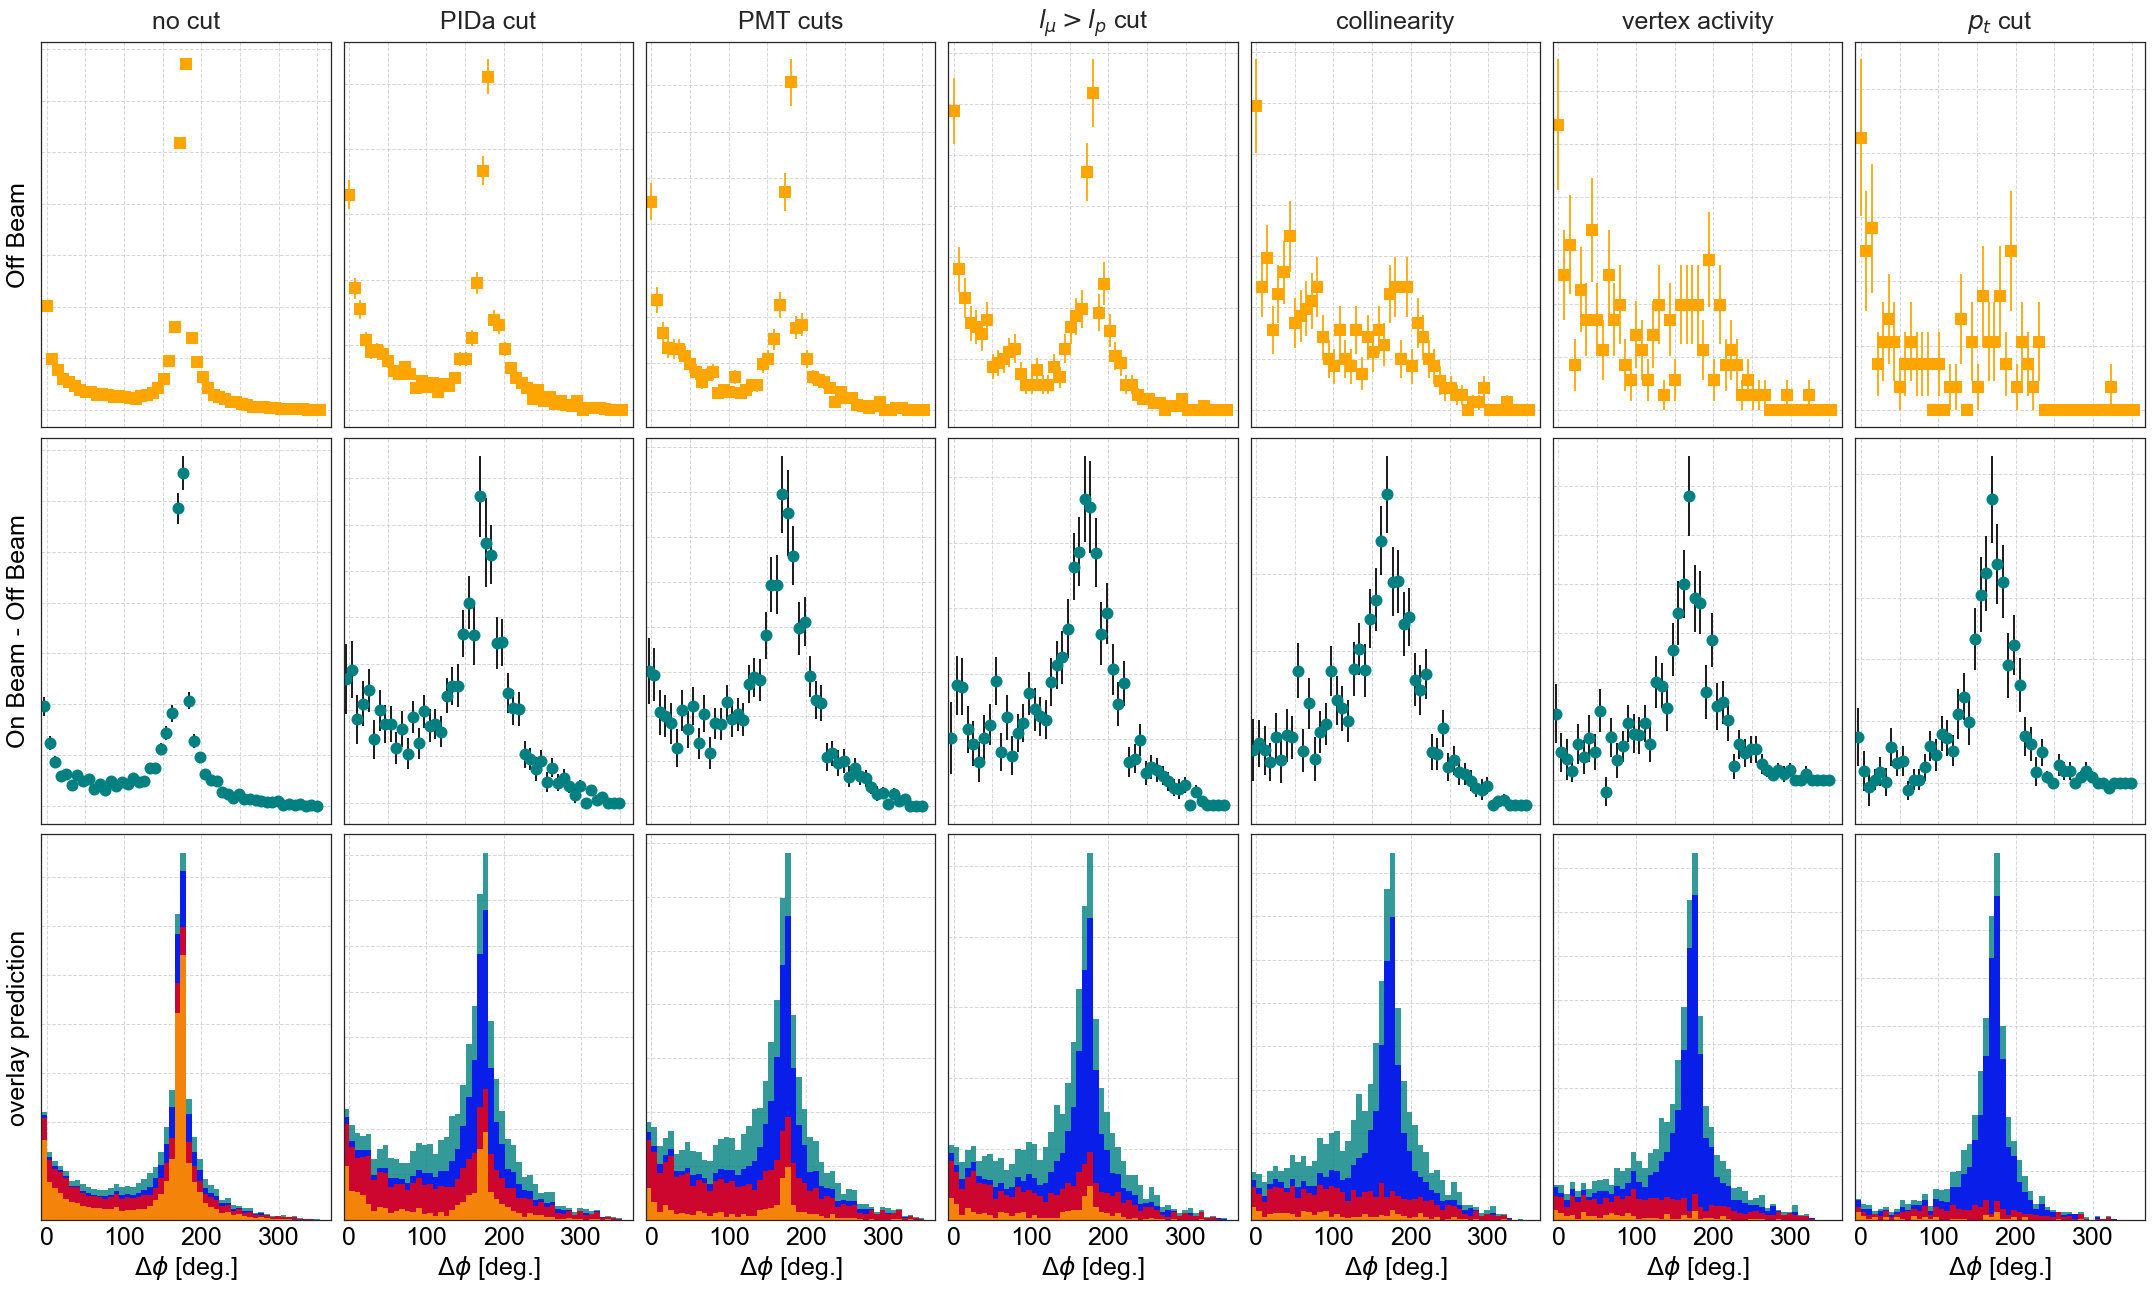

In [13]:
bins=np.linspace(0,360,51)
var='delta_phi'
x_label = r'$\Delta \phi$ [deg.]'
fig = plt.figure(figsize=(30,18))

for i_cut,(cut_name,cut_label) in enumerate(zip(['no cut','PIDa','flash','length','non-collinearity','vertex activity','soft Pt']
                                ,['no cut','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', '$p_t$ cut'])):
        
    ax = fig.add_subplot(3,7,i_cut+1)
    plot_OffBeam(OffBeamSample=reducedOffBeam[cut_name],OffBeamFV=reducedOffBeam['no cut']
                    , var=var, x_label='', bins=bins, ax=ax , y_label='Off Beam' if i_cut==0 else ''
                    , do_add_legend=False , legend_loc='best'                    
                 , do_OffBeam_scaling=True)
    ax.get_xaxis().set_major_formatter(NullFormatter())
    ax.set_title(cut_label,y=1.02,fontsize=25)
    ax.get_yaxis().set_major_formatter(NullFormatter())
    
    ax = fig.add_subplot(3,7,i_cut+7+1)
    ax=OnBeam_minus_OffBeam_1d(debug=0,doOffBeam_scaling=True
                                   ,OnBeamSample=reducedOnBeam[cut_name] ,OriginalOnBeamSample=reducedOnBeam['no cut']
                                   ,OffBeamSample=reducedOffBeam[cut_name]  ,OriginalOffBeamSample=reducedOffBeam['no cut']
                                   ,do_add_MCoverlay=False , y_label='On Beam - Off Beam' if i_cut==0 else ''
                                   ,var=var , x_label='' ,bins=bins  , ax=ax, do_add_legend=False
                                  )  
    ax.get_xaxis().set_major_formatter(NullFormatter())
    ax.get_yaxis().set_major_formatter(NullFormatter())


    ax = fig.add_subplot(3,7,i_cut+14+1)
    plot_stacked_MCsamples( debug=0
                           , MCsamples=reducedOverlay[cut_name]
                           , MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                           , var=var, x_label=x_label, y_label='overlay prediction' if i_cut==0 else ''
                              , bins=bins , alpha=0.8, ax=ax)
    ax.get_yaxis().set_major_formatter(NullFormatter())
    ax.set_xticks([0,100,200,300])
    
plt.tight_layout()
    
filename = figures_path+'delta_phi_with_cuts.pdf'
plt.savefig(filename, bbox_inches='tight')
print 'saved',filename

In [ ]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['no cut']
reduced_OffBeam['non-collinearity first'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['non-collinearity first'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]



# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]


# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

# cut on l_p>10 cm
sam = reduced_OffBeam['soft Pt']
reduced_OffBeam['l_p_min_10'] = sam[sam['l_assigned_proton']>10]
sam = reduced_OnBeam['soft Pt']
reduced_OnBeam['l_p_min_10'] = sam[sam['l_assigned_proton']>10]

# lets get to buissiness

In [ ]:
#     draw_var(cut_name='soft Pt',var='reco_Q2',x_label='$Q^2$ (GeV/c)$^2$',bins=np.linspace(0.0,1.0,25)
#              ,reduced_OnBeam=reduced_OnBeam
#              ,reduced_OffBeam=reduced_OffBeam,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
#              ,do_cosmic_only=False
#              ,do_bnb_only=True
#              ,chi2_xrange=(0,1),chi2_xy=(0.6,50)
#              ,debug=2,do_save_fig=True)
draw_var(cut_name='soft Pt',var='l_assigned_proton',x_label='$l^p$ [cm]'         
         ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
         ,bins=np.linspace(0,100,41)
         ,chi2_xrange=(0,100),chi2_xy=(20,50)
         ,reduced_OnBeam=reduced_OnBeam
         ,reduced_OffBeam=reduced_OffBeam
         ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
         ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
         ,do_cosmic_only=False,do_bnb_only=True         
         ,debug=2,do_save_fig=True,figures_path=figures_path)    

In [ ]:
cut_name = 'soft Pt' # 'no cut','non-collinearity first',
observables = ['l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt','reco_Q2']
x_labels = [r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]','$Q^2$ (GeV/c)$^2$']
x_bins = [np.linspace(0,210,31),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,31),np.linspace(0,360,73),np.linspace(0.0,0.7,21),np.linspace(0.0,1.0,25)]
chi2_xranges = [(0,210),(0,70),(12,40),(0,20),(30,150),(140,220),(0,0.4),(0,1)]
chi2_xy_text = [(100,30),(20,60),(25,40),(10,60),(30,35),(220,70),(0.4,50),(0.6,50)]
for var,x_label,bins,chi2_xrange,chi2_xy in zip(observables
                                                 ,x_labels
                                                 ,x_bins
                                                 ,chi2_xranges
                                                 ,chi2_xy_text):
    draw_var(cut_name=cut_name,var=var,x_label=x_label,bins=bins
             ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
             ,reduced_OnBeam=reduced_OnBeam
             ,reduced_OffBeam=reduced_OffBeam
             ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
             ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
             ,do_cosmic_only=False
             ,do_bnb_only=True
             ,chi2_xrange=chi2_xrange,chi2_xy=chi2_xy
             ,debug=0,do_save_fig=True,figures_path=figures_path)

# 2D

In [ ]:
cut_name = 'soft Pt'
varx='l_assigned_proton'
x_label=r'$l^{p}$ [cm]'
vary='PIDa_assigned_proton'
y_label=r'$PID_a^{p}$'
OnBeam_minus_OffBeam_2d( OnBeamSample=reduced_OnBeam[cut_name] , OffBeamSample=reduced_OffBeam[cut_name]
                        , debug=0                        
                        , varx=varx , x_label=x_label
                        , vary=vary , y_label=y_label
                        , bins=(np.linspace(0,100,41),np.linspace(0,40,41)), cmap='RdBu_r'
                        )
filename = figures_path+varx+"_vs_"+vary+'_'+'after_cut_'+cut_name+'.pdf'
print 'saved', filename
plt.savefig(filename)

OnBeam_minus_OffBeam_2d( OnBeamSample=reduced_OnBeam[cut_name] , OffBeamSample=reduced_OffBeam[cut_name]
                        , debug=0                        
                        , varx=varx , x_label=x_label
                        , vary=vary , y_label=y_label
                        , bins=(np.linspace(0,20,21),np.linspace(12,40,29)), cmap='RdBu_r'
                        )
filename = figures_path+varx+"_vs_"+vary+'_'+'after_cut_'+cut_name+'_zoomin_'+'.pdf'
print 'saved', filename
plt.savefig(filename)

# after a cut on $l_p>10$ cm

In [ ]:
draw_var(cut_name='l_p_min_10',var='PIDa_assigned_proton',x_label=r'$PID_a^p$'
         ,bins=np.linspace(0,40,41)
         ,chi2_xrange=(12,40),chi2_xy=(20,50)
             ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
             ,reduced_OnBeam=reduced_OnBeam
             ,reduced_OffBeam=reduced_OffBeam
             ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
             ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
             ,do_cosmic_only=False
             ,do_bnb_only=True
         ,debug=0,do_save_fig=True,figures_path=figures_path)    

# before kinematical cuts

In [ ]:
draw_var(cut_name='vertex activity',var='theta_12',x_label=r'$\theta^{12}$ [deg.]'
         ,bins=np.linspace(0,180,31)
         ,chi2_xrange=(30,150),chi2_xy=(20,50)
               ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
             ,reduced_OnBeam=reduced_OnBeam
             ,reduced_OffBeam=reduced_OffBeam
             ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
             ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
             ,do_cosmic_only=False
             ,do_bnb_only=True
         ,debug=0,do_save_fig=True,figures_path=figures_path)    